In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\FOLDER\DATA SCIENCE\R_DAY_1\emp_health.csv")

In [3]:
df

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


 Read the dataset and do primary study of data. Perform following steps: 

 a. Reading some rows of dataset

 b. Learn data types of all features
 
 c. See the statistical properties of the data.


In [6]:
df.head(20)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
5,i10017,31,female,25.740,0,no,no,south,3756.62160
6,i10018,46,female,33.440,1,daily,no,south,8240.58960
7,i10019,37,female,27.740,3,weekend,no,northwest,7281.50560
8,i10020,37,male,29.830,2,party,no,north,6406.41070
9,i10021,60,female,25.840,0,no,no,northwest,28923.13692


In [7]:
df.dtypes

id              object
age              int64
sex             object
bmi            float64
dependent        int64
alcohol         object
smoke           object
zone            object
expenditure    float64
dtype: object

In [8]:
df.describe(include= 'all')

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
count,1338,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338,1338.000000
unique,1338,NaN,2,NaN,NaN,5,2,8,NaN
top,i10012,NaN,male,NaN,NaN,daily,no,east,NaN
freq,1,NaN,676,NaN,NaN,395,1064,262,NaN
mean,NaN,39.207025,NaN,30.663397,1.094918,NaN,NaN,NaN,13270.422265
std,NaN,14.049960,NaN,6.098187,1.205493,NaN,NaN,NaN,12110.011237
min,NaN,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN,1121.873900
25%,NaN,27.000000,NaN,26.296250,0.000000,NaN,NaN,NaN,4740.287150
50%,NaN,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN,9382.033000
75%,NaN,51.000000,NaN,34.693750,2.000000,NaN,NaN,NaN,16639.912515


1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [27]:
no_of_smokers, avg_expenditure = df[(df['age'] > 50) & (df['smoke'] == 'yes')].agg({'id': 'count', 'expenditure': 'mean'})
print(no_of_smokers)
print(avg_expenditure)

64.0
38820.22308234376


2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [183]:
consume_alcohol = df[df['alcohol'] != 'no']
fem_not_alcohol = consume_alcohol[(consume_alcohol['sex'] =='female') & (consume_alcohol['alcohol'] != 'daily')]['id'].count()
tot_fem_emp = df[df['sex'] == 'female']['id'].count()
proportion = fem_not_alcohol / tot_fem_emp
proportion

0.5151057401812689

 3. Display zone wise average expenditure of employees on health

In [46]:
df.groupby('zone')['expenditure'].mean()

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

4. Employees of which zone did maximum expenditure on health

In [52]:
df.loc[df['expenditure'].idxmax(), 'zone']

'southeast'

 5. What is the minimum expenditure done by any employee in organization

In [53]:
df['expenditure'].min()

1121.8739

 6. What is average expenditure of employees who have 2 or lesser dependents

In [57]:
df[df['dependent'] <= 2].expenditure.mean()

13040.970970948154

7. How many employees are below age of 20 years. What is their average BMI

In [66]:
emp_below_20 = df[df['age'] < 20]
print(emp_below_20.id.count())
print(emp_below_20.bmi.mean())

137
29.97149635036496


8. Create a dataframe "non_smoker" for all non-smoker male employees

In [95]:
non_smoker = df[(df['sex'] == 'male') & (df['smoke'] == 'no')]
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [93]:
non_alcoholic = df[(df['sex'] == 'male') & (df['alcohol'].isin(['no', 'rarely']))]
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
...,...,...,...,...,...,...,...,...,...
1294,i11306,58,male,25.175,0,rarely,no,east,11931.12525
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


 10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol
 (Hint:Use join and dataframes created in Q8 and Q9)


In [91]:
non_smoking_alcoholic = pd.merge(non_smoker, non_alcoholic)[['id', 'smoke', 'alcohol']]
non_smoking_alcoholic

,id,smoke,alcohol
0,i10014,no,rarely
1,i10030,no,no
2,i10036,no,no
3,i10040,no,no
4,i10049,no,no
...,...,...,...
127,i11285,no,rarely
128,i11306,no,rarely
129,i11322,no,no
130,i11332,no,no


 11.What is the count for each zone with respect to number of dependent

In [98]:
zone_dependent = df.groupby(['zone', 'dependent']).size().reset_index(name = 'counts')
zone_dependent

,zone,dependent,counts
0,east,0,124
1,east,1,65
2,east,2,42
3,east,3,22
4,east,4,6
5,east,5,3
6,north,0,26
7,north,1,20
8,north,2,10
9,north,3,12


12. Classify the employees into 3 categories.

 Category 1 : employees below 18.5 bmi - underweight

 Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit

 Category 3 : employee with bmi over 24.9 - overweight

 What is the average expenditure of employees in each category.
 
 Display the bar chart for the same


In [100]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 24.9:
        return 'fit'
    else:
        return 'overweight'

In [101]:
df['bmi_category'] = df['bmi'].apply(classify_bmi)
df

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,bmi_category
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400,overweight
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230,overweight
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200,overweight
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061,fit
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830,overweight
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080,overweight
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350,overweight
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500,overweight


In [102]:
avg_expendi = df.groupby('bmi_category')['expenditure'].mean().reset_index()
avg_expendi

,bmi_category,expenditure
0,fit,10379.499732
1,overweight,13936.616823
2,underweight,8852.200585


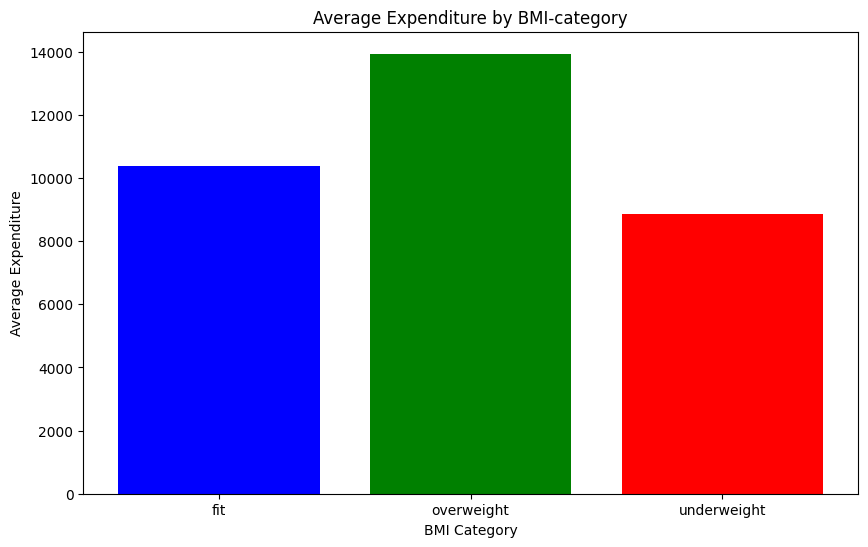

In [117]:
plt.figure(figsize=(10,6))
plt.bar(avg_expendi['bmi_category'], avg_expendi['expenditure'], color = ['Blue', 'green', 'red'])
plt.xlabel('BMI Category')
plt.ylabel('Average Expenditure')
plt.title('Average Expenditure by BMI-category')
plt.show()

13. Draw line plot of expenditure against age and BMI

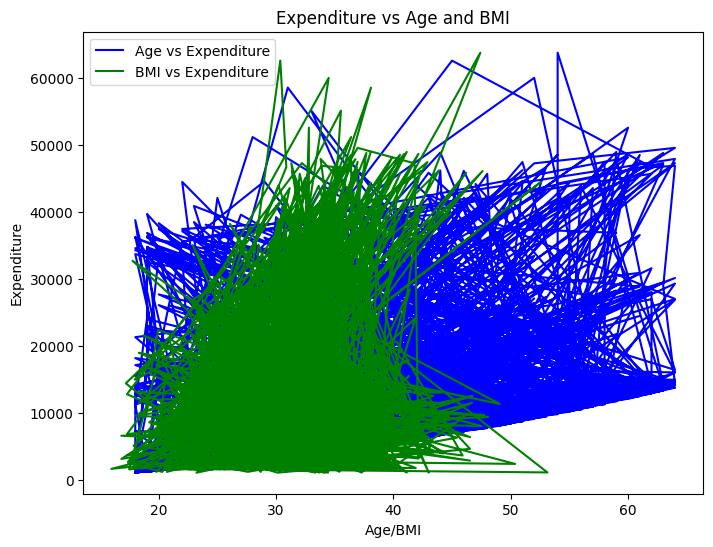

In [123]:
plt.figure(figsize=(8,6))
plt.plot(df['age'], df['expenditure'], label = 'Age vs Expenditure', color = 'Blue')
plt.plot(df['bmi'], df['expenditure'], label = 'BMI vs Expenditure', color = 'green')
plt.xlabel('Age/BMI')
plt.ylabel('Expenditure')
plt.title('Expenditure vs Age and BMI')
plt.legend()
plt.show()

14. Draw a bar chart to show zone wise average expenditure

In [126]:
zone_wise = df.groupby('zone')['expenditure'].mean().reset_index()

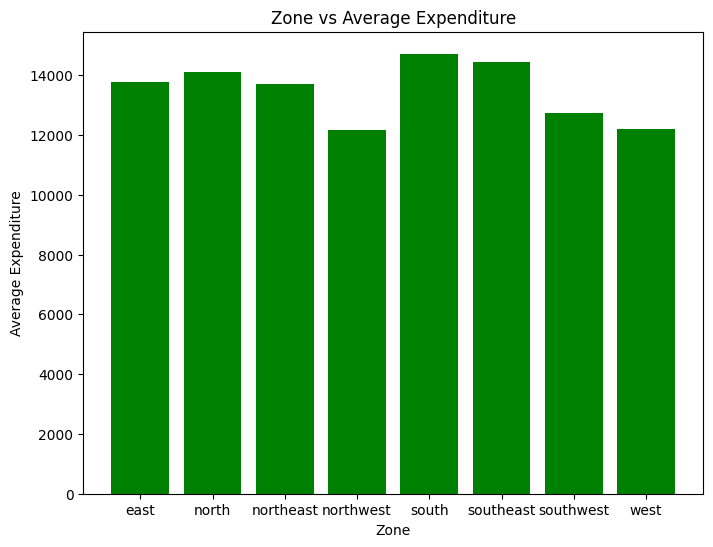

In [186]:
plt.figure(figsize=(8,6))
plt.bar(zone_wise['zone'], zone_wise['expenditure'], color='green')
plt.xlabel('Zone')
plt.ylabel('Average Expenditure')
plt.title('Zone vs Average Expenditure')
plt.show()

15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

In [187]:
alco_sm = df.groupby(['alcohol', 'smoke'])['expenditure'].mean().reset_index()
alco_sm

,alcohol,smoke,expenditure
0,daily,no,8462.115558
1,daily,yes,31160.402608
2,no,no,8628.618182
3,no,yes,32224.657378
4,party,no,8295.247250
5,party,yes,31487.938163
6,rarely,no,5785.022944
7,rarely,yes,31881.367379
8,weekend,no,8784.631185
9,weekend,yes,33592.294629


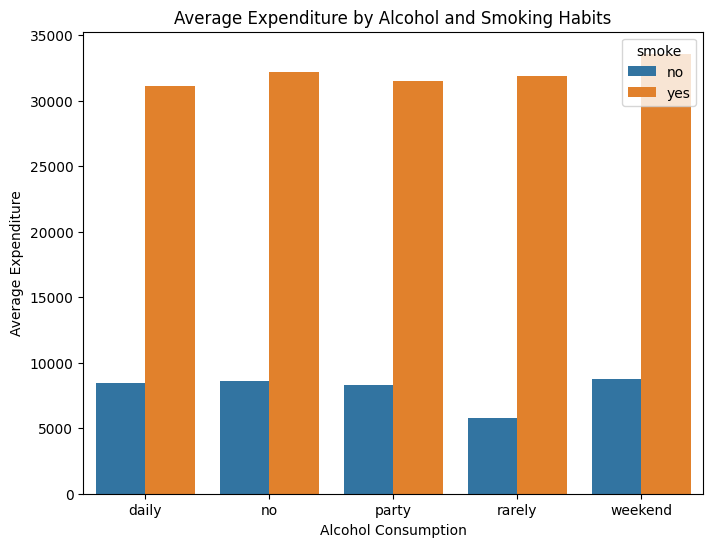

In [143]:
plt.figure(figsize=(8,6))
sns.barplot(x='alcohol', y='expenditure', hue='smoke', data=alco_sm)
plt.xlabel('Alcohol Consumption')
plt.ylabel('Average Expenditure')
plt.title('Average Expenditure by Alcohol and Smoking Habits')
plt.show()

16. Draw pie chart for alcohol consumption habits

In [144]:
alcohol_consumption = df['alcohol'].value_counts()
alcohol_consumption

alcohol
daily      395
weekend    347
party      278
no         259
rarely      59
Name: count, dtype: int64

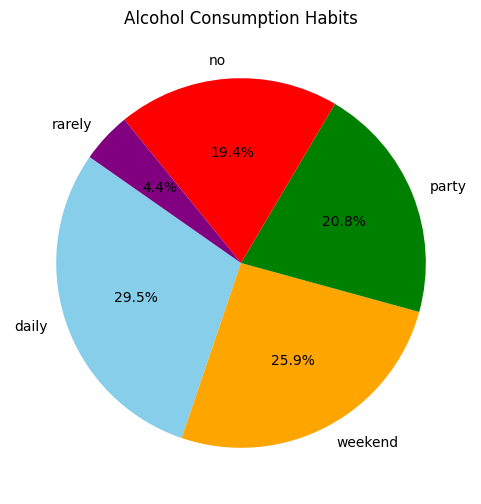

In [190]:
plt.figure(figsize=(6,6))
plt.pie(alcohol_consumption, labels=alcohol_consumption.index, autopct='%1.1f%%', startangle=145, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Alcohol Consumption Habits')
plt.show()

17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

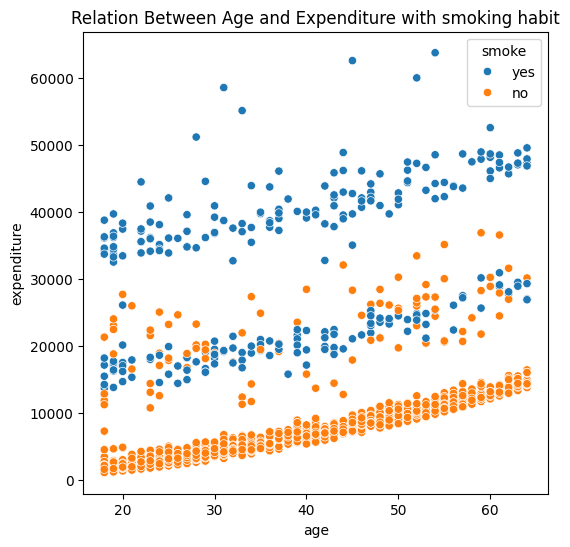

In [161]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='age', y='expenditure', hue='smoke', data=df)
plt.title('Relation Between Age and Expenditure with smoking habit')
plt.show()

18. Draw distribution plot of expenditure

<Figure size 600x600 with 0 Axes>

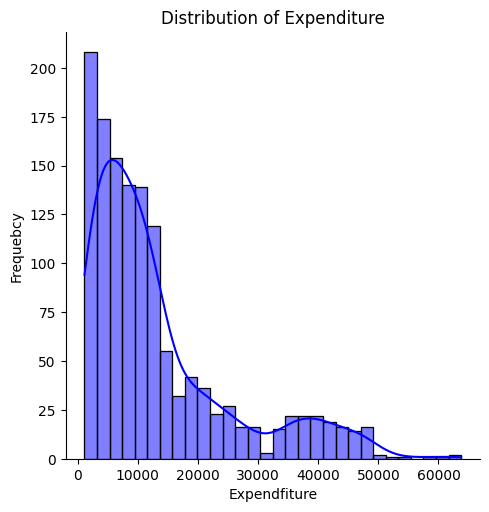

In [170]:
plt.figure(figsize=(6,6))
sns.displot(df['expenditure'], kde=True, bins=30, color='blue')
plt.xlabel('Expendfiture')
plt.ylabel('Frequebcy')
plt.title('Distribution of Expenditure')
plt.show()

19. Display the pairplot

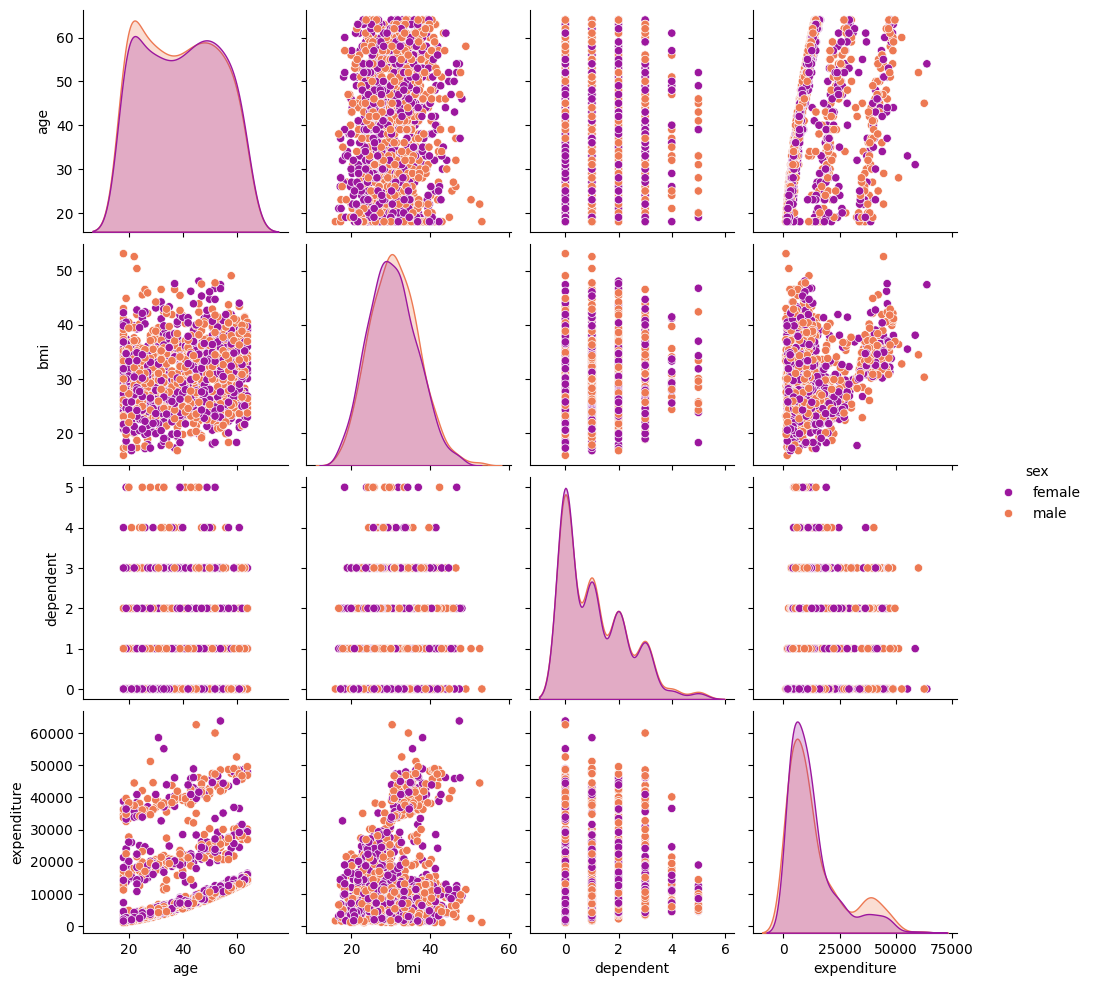

In [197]:
sns.pairplot(df, hue='sex', palette='plasma')
plt.show()

20. Display heatmap for the data

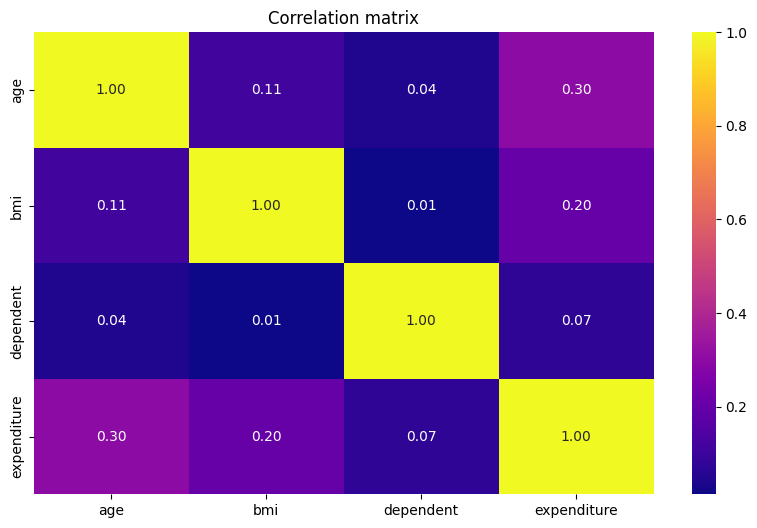

In [178]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation matrix')
plt.show()